(784,)


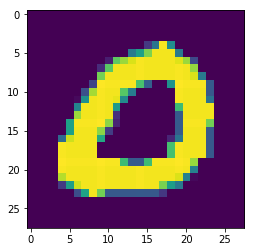

In [1]:
import scipy.io
mat = scipy.io.loadmat('data/digits-train.mat')

import matplotlib.pyplot as plt
import numpy as np
x = np.array(mat['images_train'][:,0])
print(x.shape)
plt.imshow(x.reshape(28,28))
plt.show()

In [17]:
feat = mat['fea_hog_train']

In [9]:
from sklearn.metrics.cluster import supervised
from scipy.optimize import linear_sum_assignment

def accuracy(labels_true, labels_pred):
    labels_true, labels_pred = supervised.check_clusterings(labels_true, labels_pred)
    # labels_true : int array with ground truth labels, shape = [n_samples]
    # labels_pred : int array with estimated labels, shape = [n_samples]
    value = supervised.contingency_matrix(labels_true, labels_pred)
    # value : array of shape [n, n] whose (i, j)-th entry is the number of samples in true class i and in predicted class j
    [r, c] = linear_sum_assignment(-value)
    return value[r, c].sum() / len(labels_true)

In [11]:
accuracy([2]*10,[1]*10)

1.0

In [26]:
np.reshape(mat['labels_train'],-1).shape

(5000,)

In [32]:
from sklearn.cluster import KMeans
from sklearn.cluster import Spectral
import numpy as np
kmeans = SpectralClust(n_clusters=5, random_state=0).fit_predict(np.transpose(feat))
print(kmeans)
print(np.transpose(kmeans))
accuracy(kmeans, np.reshape(mat['labels_train'],-1))
# kmeans.labels_
# np.array([0, 0, 0, 1, 1, 1], dtype=int32)
# kmeans.predict([[0, 0], [4, 4]])
# np.array([0, 1], dtype=int32)
# kmeans.cluster_centers_


[2 1 2 ..., 1 1 1]
[2 1 2 ..., 1 1 1]


0.62760000000000005